# 06. Transfer Learning in TensorFlow Part 3: Scaling-up Exercises

## 1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
images_dir = "drive/MyDrive/Tensorflow_Zero_to_Mastery/Images/06_exercices"
image_names = os.listdir(images_dir)
image_names

['curry.jpg', 'nachos.jpg', 'pizza.jpg']

(-0.5, 3999.5, 2999.5, -0.5)

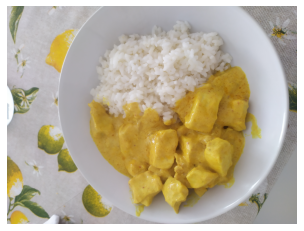

In [9]:
image = plt.imread(images_dir + "/" + image_names[0])
plt.imshow(image)
plt.axis(False)

In [13]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Tensorflow_Zero_to_Mastery/101_food_classes_10_percent_saved_big_dog_model")

In [14]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 910,821
Non-trainab

In [18]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2022-04-01 10:05:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-01 10:05:29 (65.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2022-04-01 10:05:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.121.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   208MB/s    in 7.4s    

2022-04-01 10:05:38 (210 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [43]:
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                        label_mode="categorical",
                                                                        image_size=(IMG_SIZE))

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=(IMG_SIZE))

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [25]:
class_names = train_data_all_10_percent.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [36]:
loaded_model.predict(tf.expand_dims(image, 0))

array([[4.90707196e-02, 1.55452835e-05, 2.86959039e-05, 4.26421793e-05,
        9.74026698e-05, 3.29115755e-06, 1.40028885e-06, 2.20423171e-05,
        4.01981547e-03, 3.66283493e-04, 1.00325700e-03, 2.45897481e-05,
        4.77503909e-06, 6.63551094e-04, 2.30910773e-05, 1.15877650e-04,
        1.04441016e-04, 9.26869106e-05, 1.48085447e-03, 2.35060463e-04,
        1.54790527e-04, 1.40393649e-06, 7.54116854e-06, 1.97125951e-06,
        2.34095598e-04, 1.64444136e-05, 1.29245594e-02, 5.07803459e-04,
        1.20087927e-04, 3.05512140e-06, 5.42195230e-05, 1.66648868e-04,
        3.92734568e-04, 2.66941811e-07, 1.53421468e-04, 5.91650270e-02,
        2.59226118e-03, 2.51083472e-03, 1.03214996e-04, 1.02627841e-04,
        2.91736706e-06, 2.29801703e-03, 3.41549923e-04, 1.66759931e-03,
        2.92415556e-04, 5.00221518e-07, 9.07731522e-03, 1.11595849e-02,
        1.02472486e-05, 3.74004478e-04, 2.80178123e-04, 3.22024061e-05,
        7.92638282e-04, 1.11981666e-04, 1.20953169e-04, 8.479482

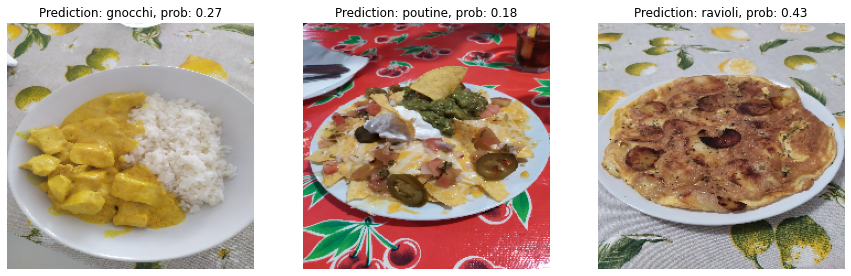

In [40]:
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(image_names):
  plt.subplot(1, 3, i+1)
  image = tf.io.read_file(images_dir + "/" + img_name)
  # Decode image into tensor
  image = tf.io.decode_image(image, channels=3)
  image = tf.image.resize(image, [IMG_SIZE[0], IMG_SIZE[1]])
  image = tf.image.rot90(image, k=-1)
  pred_probs = loaded_model.predict(tf.expand_dims(image, 0))
  pred_class = class_names[pred_probs.argmax()]
  plt.imshow(image/255.)
  plt.title(f"Prediction: {pred_class}, prob: {pred_probs.max():.2f}")
  plt.axis(False)

## 2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

In [62]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [63]:
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [64]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [65]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model.fit(train_data_all_10_percent,
                      epochs=10,
                      validation_data=test_data,
                      validation_steps=int(0.15 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 75s 283ms/step - loss: 3.1550 - accuracy: 0.3221 - val_loss: 2.2090 - val_accuracy: 0.5114
Epoch 2/10
237/237 [==============================] - 62s 260ms/step - loss: 1.8631 - accuracy: 0.5827 - val_loss: 1.8159 - val_accuracy: 0.5636
Epoch 3/10
237/237 [==============================] - 62s 261ms/step - loss: 1.4531 - accuracy: 0.6692 - val_loss: 1.6803 - val_accuracy: 0.5771
Epoch 4/10
237/237 [==============================] - 62s 261ms/step - loss: 1.2070 - accuracy: 0.7283 - val_loss: 1.6014 - val_accuracy: 0.5832
Epoch 5/10
237/237 [==============================] - 62s 261ms/step - loss: 1.0277 - accuracy: 0.7768 - val_loss: 1.5681 - val_accuracy: 0.5924
Epoch 6/10
237/237 [==============================] - 62s 261ms/step - loss: 0.8876 - accuracy: 0.8154 - val_loss: 1.5324 - val_accuracy: 0.5972
Epoch 7/10
237/237 [==============================] - 62s 261ms/step - loss: 0.7747 - accuracy: 0.8478 - val_loss: 1.5256 - val_ac

In [66]:
model.evaluate(test_data)

790/790 [==============================] - 138s 174ms/step - loss: 1.4835 - accuracy: 0.6063


[1.4835097789764404, 0.6063366532325745]

In [67]:
inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [68]:
history_2 = model_2.fit(train_data_all_10_percent,
                      epochs=5,
                      validation_data=test_data,
                      validation_steps=int(0.15 * len(test_data)))

Epoch 1/5
237/237 [==============================] - 71s 267ms/step - loss: 3.1477 - accuracy: 0.3187 - val_loss: 2.1982 - val_accuracy: 0.5135
Epoch 2/5
237/237 [==============================] - 62s 261ms/step - loss: 1.8628 - accuracy: 0.5822 - val_loss: 1.8187 - val_accuracy: 0.5628
Epoch 3/5
237/237 [==============================] - 62s 261ms/step - loss: 1.4520 - accuracy: 0.6627 - val_loss: 1.6831 - val_accuracy: 0.5816
Epoch 4/5
237/237 [==============================] - 62s 260ms/step - loss: 1.2065 - accuracy: 0.7270 - val_loss: 1.6060 - val_accuracy: 0.5885
Epoch 5/5
237/237 [==============================] - 62s 260ms/step - loss: 1.0264 - accuracy: 0.7791 - val_loss: 1.5603 - val_accuracy: 0.5959


In [69]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [70]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [71]:
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_2.fit(train_data_all_10_percent,
                      epochs=10,
                      validation_data=test_data,
                      initial_epoch = history_2.epoch[-1]+1,
                      validation_steps=int(0.15 * len(test_data)))

Epoch 6/10
237/237 [==============================] - 73s 274ms/step - loss: 1.0637 - accuracy: 0.7097 - val_loss: 1.5982 - val_accuracy: 0.5908
Epoch 7/10
237/237 [==============================] - 64s 267ms/step - loss: 0.4939 - accuracy: 0.8746 - val_loss: 1.7204 - val_accuracy: 0.5784
Epoch 8/10
237/237 [==============================] - 64s 267ms/step - loss: 0.2193 - accuracy: 0.9518 - val_loss: 1.8159 - val_accuracy: 0.5869
Epoch 9/10
237/237 [==============================] - 64s 267ms/step - loss: 0.1124 - accuracy: 0.9794 - val_loss: 2.0219 - val_accuracy: 0.5776
Epoch 10/10
237/237 [==============================] - 64s 267ms/step - loss: 0.0677 - accuracy: 0.9901 - val_loss: 2.0044 - val_accuracy: 0.5794


In [72]:
model_2.evaluate(test_data)

790/790 [==============================] - 139s 176ms/step - loss: 1.9544 - accuracy: 0.5872


[1.954355001449585, 0.5871683359146118]

Feature extraction is slightly better

## 3.Recreate the first model (the feature extraction model) with mixed_precision turned on.

In [75]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [76]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float16
Variable dtype: float32


In [77]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [79]:
outputs # dtype is float16

<KerasTensor: shape=(None, 101) dtype=float16 (created by layer 'output_layer')>

In [78]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_4 = model.fit(train_data_all_10_percent,
                      epochs=10,
                      validation_data=test_data,
                      validation_steps=int(0.15 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 89s 275ms/step - loss: 3.1622 - accuracy: 0.3220 - val_loss: 2.2115 - val_accuracy: 0.5098
Epoch 2/10
237/237 [==============================] - 56s 232ms/step - loss: 1.8624 - accuracy: 0.5766 - val_loss: 1.8192 - val_accuracy: 0.5577
Epoch 3/10
237/237 [==============================] - 54s 226ms/step - loss: 1.4523 - accuracy: 0.6667 - val_loss: 1.6757 - val_accuracy: 0.5742
Epoch 4/10
237/237 [==============================] - 54s 225ms/step - loss: 1.2048 - accuracy: 0.7250 - val_loss: 1.6019 - val_accuracy: 0.5863
Epoch 5/10
237/237 [==============================] - 55s 232ms/step - loss: 1.0273 - accuracy: 0.7786 - val_loss: 1.5557 - val_accuracy: 0.5964
Epoch 6/10
237/237 [==============================] - 54s 225ms/step - loss: 0.8872 - accuracy: 0.8129 - val_loss: 1.5314 - val_accuracy: 0.5990
Epoch 7/10
237/237 [==============================] - 54s 225ms/step - loss: 0.7727 - accuracy: 0.8458 - val_loss: 1.5299 - val_ac

Training is faster with mixed precision using float16